In [17]:
from sklearn.datasets import load_boston
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline 

In [34]:
import sklearn
sklearn.__version__

'0.21.3'

In [3]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=4)

In [26]:
#decision tree application
tree_model = DecisionTreeRegressor(min_samples_leaf=10, 
                                   random_state=3)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=3, splitter='best')

In [27]:
train_score = tree_model.score(X_train, y_train)
test_score = tree_model.score(X_test, y_test)
print("R2 of the training set is", train_score)
print("R2 of the test set is", test_score)

R2 of the training set is 0.8544918815605168
R2 of the test set is 0.7461549730143566


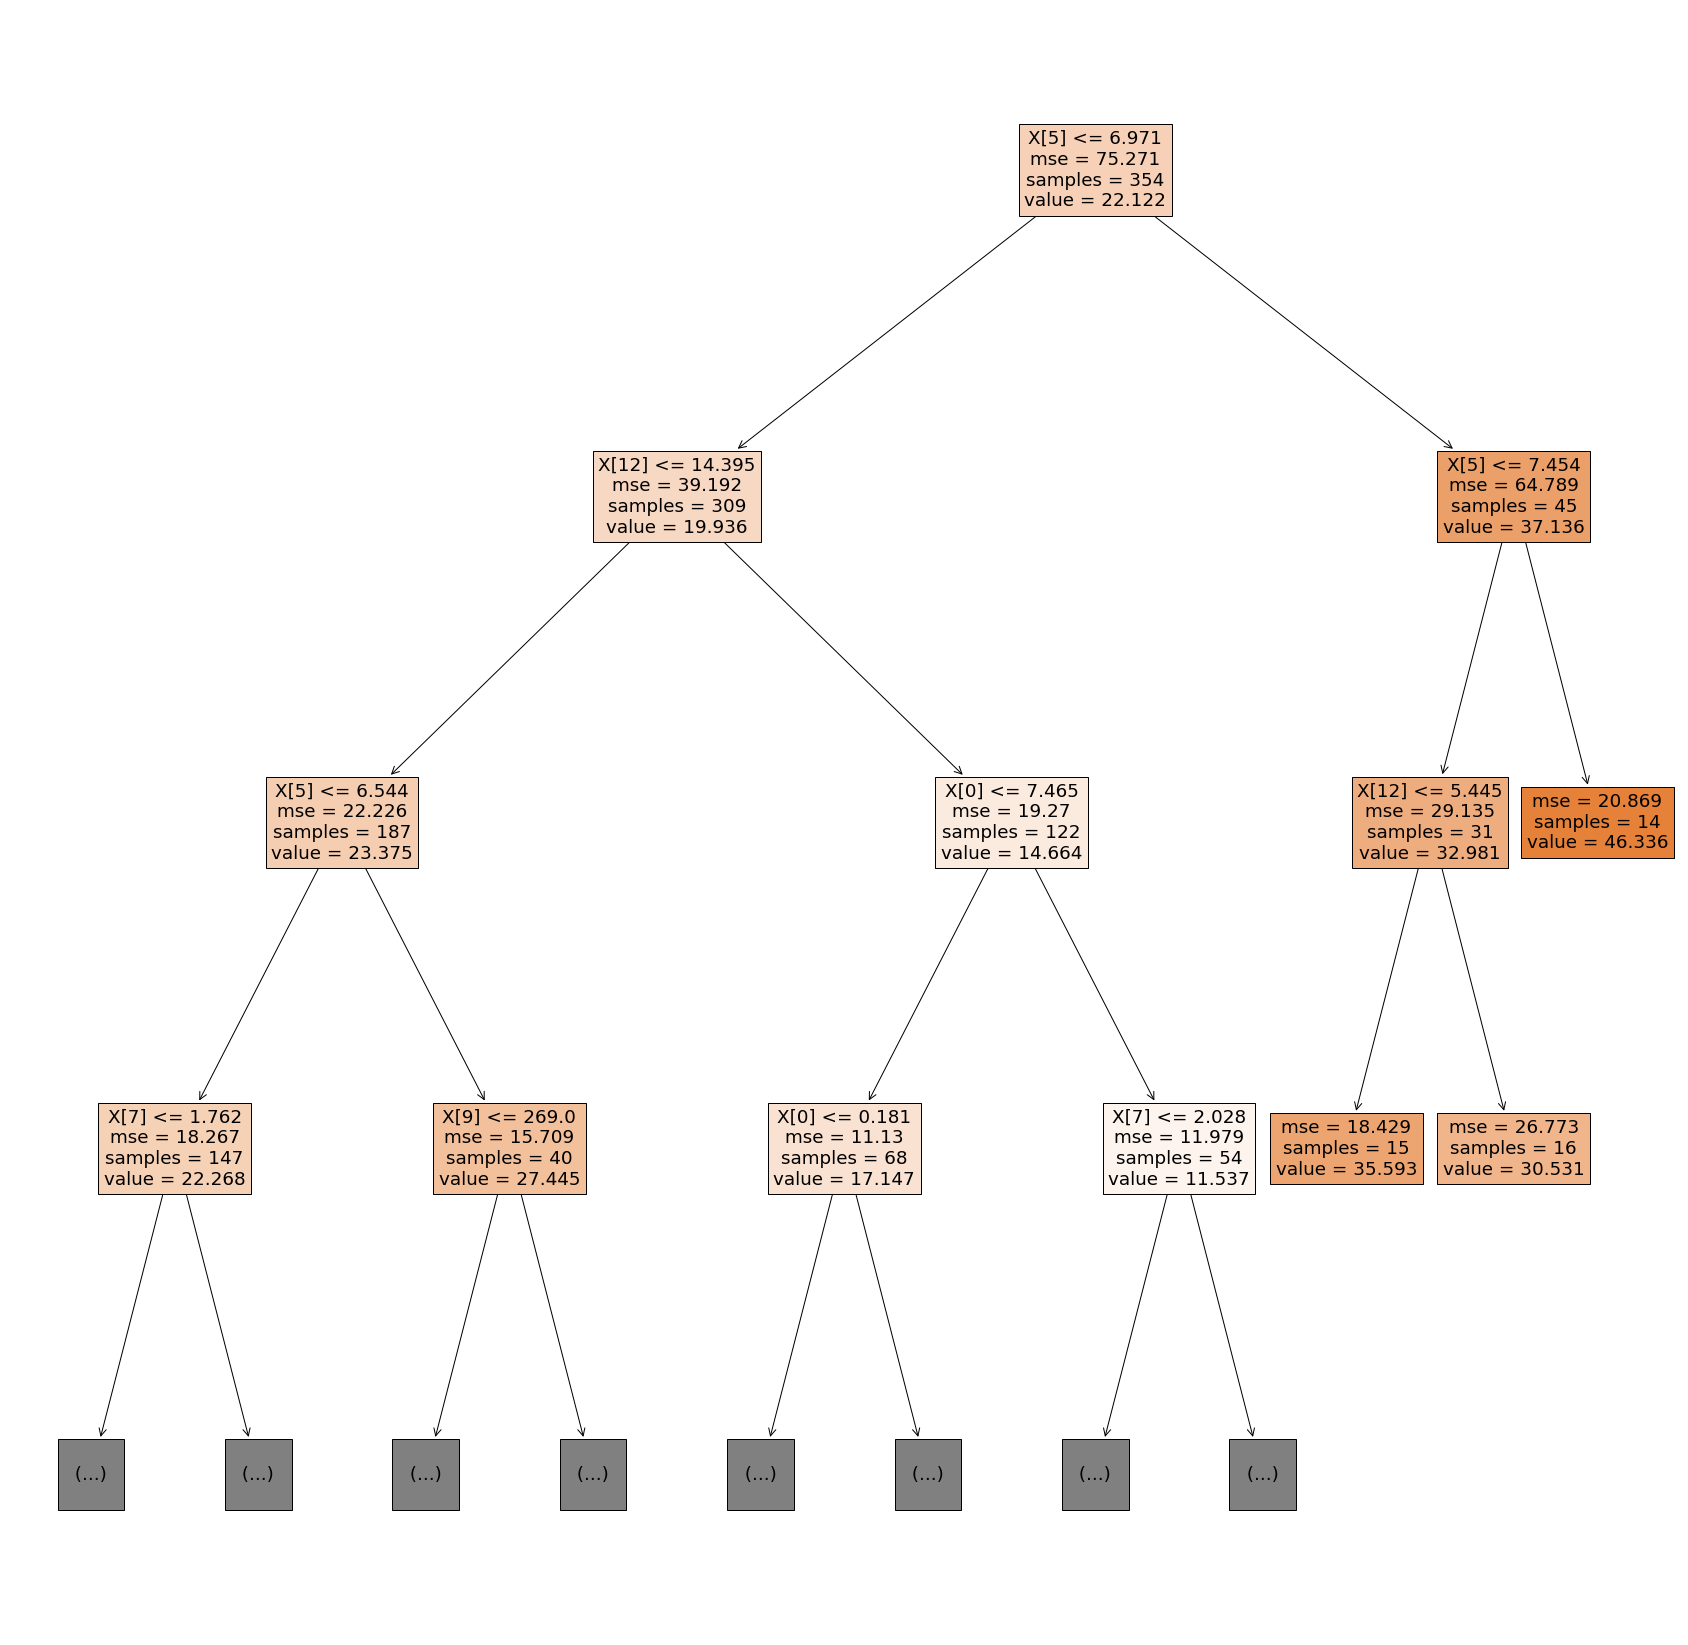

In [28]:
# visualize tree
fig = plt.figure(figsize=(30,30))
tree.plot_tree(tree_model, max_depth=3, filled=True)
plt.show()

In [33]:
# finding alpha with cross-validation
# 0 ile 1 aralığını 20 eşit parçaya bölen sayıları üretiyor
alpha = np.linspace(0, 1, 20)
cv = KFold(n_splits=5, shuffle=True, random_state=5)
alpha_values = []
for i in alpha:
    cv_values = []
    for train_index, valid_index in cv.split(X_train, y_train):
        cv_tree = DecisionTreeRegressor(ccp_alpha=i)
        cv_tree.fit(X_train[train_index],
                    y_train[train_index])
        value = cv_tree.score(X_train[valid_index],
                              y_train[valid_index])
        cv_values.append(value)
    cv_values = np.asarray(cv_values)
    alpha_values.append(cv_values.mean())

best_alpha = alpha[np.argmax(alpha_values)]

TypeError: __init__() got an unexpected keyword argument 'ccp_alpha'